# PyNowCluster Playground


In [2]:
import pynowcluster.clusters
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive
import ipywidgets as widgets

In [2]:
np.random.seed(0)
n = 15
x = np.random.normal(0, 10, n)
y = np.random.normal(0, 5, n)
  
X = np.stack((x,y), axis=1)
X = X.astype(np.float32)

fractalKMeans = pynowcluster.clusters.FractalKMeans().process(X, min_cluster_size=10)

layers = fractalKMeans.get_num_layers()

def f(layer):
    layer_index = layer - 1
    layer_mask = fractalKMeans._clusters[layer_index,:]
    clusters = np.max(layer_mask) + 1

    centroids = np.empty((clusters, X.shape[1]))

    for i in range(clusters):
        samples = X[layer_mask == i] 
        plt.scatter(samples[:,0], samples[:,1])

        centroids[i,:] = np.mean(samples, axis=0)
    
    plt.scatter(centroids[:,0], centroids[:,1], marker=(5,1), color="black")


    plt.title(f"Fractal K-means clustering (n={n})")
    plt.show()

w = widgets.IntSlider(value=1, min=1, max=layers)    
interactive_plot = interactive(f, layer=w)
interactive_plot

interactive(children=(IntSlider(value=1, description='layer', max=2, min=1), Output()), _dom_classes=('widget-…

converged: True


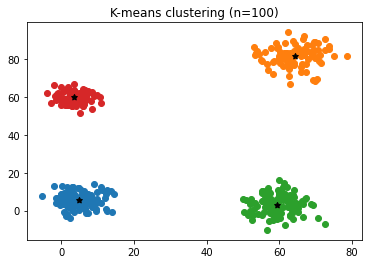

(4, 2)
[2 2 1 0 0 3 1 3 2 3 2 2 0 1 1 1 3 0 0 0 0 2 2 2 1 3 3 0 3 2 1 3 2 2 2 2 2
 2 3 3 0 2 0 1 1 0 0 0 1 3 1 0 0 3 2 1 3 0 1 0 0 3 1 0 0 3 2 3 0 1 3 3 0 3
 2 1 0 1 2 2 0 0 3 2 0 3 2 1 1 1 1 2 2 2 2 2 3 1 2 1 0 2 3 3 3 0 1 3 0 2 3
 1 2 1 2 1 3 2 2 0 1 3 0 0 1 1 1 3 2 3 3 0 1 3 1 1 2 0 2 1 3 1 1 3 0 2 2 1
 3 1 3 1 3 2 2 3 3 1 0 1 0 2 0 1 2 2 1 3 0 0 1 0 0 2 3 2 1 3 0 0 3 3 3 1 0
 1 1 0 2 0 0 3 3 2 3 0 1 3 2 1 0 2 1 1 3 0 1 0 1 0 0 2 3 2 3 1 2 3 2 0 2 3
 0 2 0 3 1 1 1 1 0 1 1 0 2 0 2 1 0 3 2 2 0 1 1 0 1 1 2 2 0 0 0 3 1 2 0 0 3
 0 0 1 1 3 2 3 3 3 2 3 3 2 2 2 3 0 3 0 3 1 0 3 1 0 3 3 0 1 2 2 0 2 3 3 0 2
 2 2 3 0 2 0 3 0 3 2 1 1 3 1 0 1 1 2 1 2 3 1 2 3 2 2 1 0 1 3 0 3 2 3 3 2 3
 2 3 1 3 1 3 0 2 1 3 3 0 1 1 2 2 1 0 3 0 1 3 1 2 1 0 0 1 2 0 2 2 1 2 1 2 0
 0 0 1 2 2 1 2 0 3 3 0 0 3 1 3 2 0 3 3 1 0 3 2 0 1 3 3 2 0 1]


In [4]:
np.random.seed(0)

data_size = 100
num_iters = 50
num_clusters = 4

# sample from Gaussians 
data1 = np.random.normal((5,5), (4, 4), (data_size,2))
data2 = np.random.normal((4,60), (3,3), (data_size, 2))
data3 = np.random.normal((65, 82), (5, 5), (data_size,2))
data4 = np.random.normal((60, 4), (5, 5), (data_size,2))

# Combine the data to create the final dataset
X = np.concatenate((data1,data2, data3, data4), axis = 0)
X = X.astype(np.float32)

np.random.shuffle(X)

kMeans = pynowcluster.clusters.KMeans().process(X, num_clusters, max_iterations=2)
print("converged:", kMeans._converged)

centroids = np.empty((num_clusters, X.shape[1]))

for i in range(num_clusters):
    samples = X[kMeans._clusters == i] 
    plt.scatter(samples[:,0], samples[:,1])

plt.scatter(kMeans._centroids[:,0], kMeans._centroids[:,1], marker=(5,1), color="black")


plt.title(f"K-means clustering (n={data_size})")
plt.show()
print(kMeans._centroids.shape)
print(kMeans._clusters)
